# Import

In [ ]:
import os
import sys
from datetime import datetime

ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))
SRC_DIR = os.path.join(ROOT_DIR, 'src')
if SRC_DIR not in sys.path:
    sys.path.insert(0, SRC_DIR)

import pandas as pd
from bs4 import BeautifulSoup
from IPython.display import display, HTML
from jinja2 import Environment, FileSystemLoader

from config_loader import load_config
from data_loader import load_data
from metrics_calculator import calculate_tables
from plot_generator import generate_plots_inline


# Setup paths

In [2]:
BASE_DIR = '/mnt/c/dev/temp_repos/py-report-sender'
NOTEBOOK_DIR = os.path.join(BASE_DIR, 'notebook')
TEMPLATE_DIR = os.path.join(BASE_DIR, 'templates')
TEMPLATE_FILE = 'report_template.html'
CONFIG_PATH = os.path.join(BASE_DIR, 'config.yaml')

sys.path.insert(0, BASE_DIR)
sys.path.insert(0, os.path.join(BASE_DIR, 'src'))
os.chdir(NOTEBOOK_DIR)



# Load Config & Data

In [3]:
config = load_config(CONFIG_PATH)
data_config = config.get('data', {})
report_config = config.get('report', {})
email_config = config.get('email', {})

df = load_data(data_config.get('file_path'))
print(f"Data loaded: {df.shape[0]} rows, {df.shape[1]} columns")
display(df.head(2))


NameError: name 'load_config' is not defined

# Generate Report


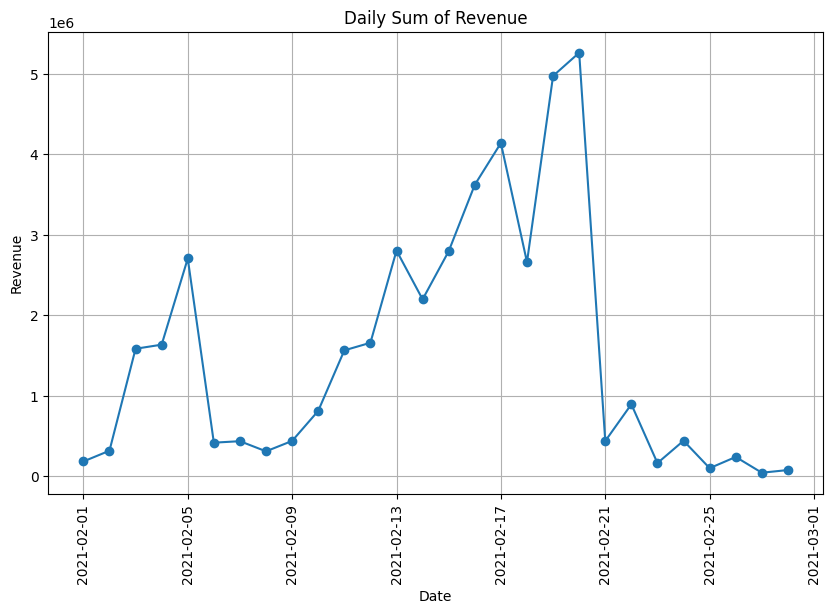
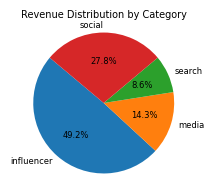

In [ ]:
TEMPLATE_DIR = os.path.join(ROOT_DIR, 'templates')
env = Environment(loader=FileSystemLoader(TEMPLATE_DIR))
template = env.get_template(TEMPLATE_FILE)
tables = calculate_tables(df)
plot1_path, plot2_path = generate_plots_inline(df)

html_report = template.render(
    report_title="Marketing Analytics Report",
    report_period=f"{df['c_date'].min().date()} to {df['c_date'].max().date()}",
    generation_time=datetime.now().strftime('%Y-%m-%d %H:%M'),
    tabla1=tables['tabla1'],
    tabla2=tables['tabla2'],
    tabla3=tables['tabla3'],
    plot1_path=plot1_path,
    plot2_path=plot2_path
)

soup = BeautifulSoup(html_report, 'html.parser')
content = soup.body or soup
display(HTML(str(content)))